# 1. Starting out

We start off as we usually do. Let's import some things that will be useful.

In [1]:
# Import pandas to read in data
import pandas as pd
import numpy as np

# Import matplotlib for plotting
import matplotlib.pylab as plt
%matplotlib inline

# Import decision trees and logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Import train, test, and evaluation functions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 2. Data
We're going to use a mail response data set from a real direct marketing campaign located in `files/mailing.csv`. 

You can download the files from [http://bit.ly/mailingData](http://bit.ly/mailingData).


Each record represents an individual who was targeted with a direct marketing offer.  The offer was a solicitation to make a charitable donation. 

The columns (features) are:

```
Col.  Name      Description
----- --------- ----------------------------------------------------------------
1     income    household income
2     Firstdate data assoc. with the first gift by this individual
3     Lastdate  data associated with the most recent gift 
4     Amount    average amount by this individual over all periods (incl. zeros)
5     rfaf2     frequency code
6     rfaa2     donation amount code
7     pepstrfl  flag indicating a star donator
8     glast     amount of last gift
9     gavr      amount of average gift
10    class     one if they gave in this campaign and zero otherwise.
```

Our goal is to build a model to predict if people will give during the current campaign (this is the attribute called `"class"`).

Let's read our data in and put the target variable in `Y` and all the other features in `X`.

In [2]:
# Read data using pandas
data = pd.read_csv("mailing.csv")

# Split into X and Y
X = data.drop(['class'], 1)
Y = data['class']

In [3]:
data.head()

,Income,Firstdate,Lastdate,Amount,rfaf2,glast,gavr,class,rfaa2_G,rfaa2_E,rfaa2_F,pepstrfl_0
0,3,9409,9509,0.06,1,50,30.00,0,1,0,0,1
1,2,9201,9602,0.16,4,20,20.55,1,1,0,0,0
2,0,9510,9603,0.20,4,5,8.75,0,0,1,0,1
3,6,9409,9603,0.13,2,25,22.50,0,1,0,0,1
4,0,9310,9511,0.10,1,25,12.50,0,1,0,0,1


In [4]:
X.head()

,Income,Firstdate,Lastdate,Amount,rfaf2,glast,gavr,rfaa2_G,rfaa2_E,rfaa2_F,pepstrfl_0
0,3,9409,9509,0.06,1,50,30.00,1,0,0,1
1,2,9201,9602,0.16,4,20,20.55,1,0,0,0
2,0,9510,9603,0.20,4,5,8.75,0,1,0,1
3,6,9409,9603,0.13,2,25,22.50,1,0,0,1
4,0,9310,9511,0.10,1,25,12.50,1,0,0,1


In [5]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: class, dtype: int64

# 3. Overfitting

Let's first create a classification algorithm called "decision tree," fit a model (learn the model from the data), and use it to get predictions on all of our data.

In [6]:
# Create an empty, unlearned tree
tree = DecisionTreeClassifier(criterion="entropy")

# Fit/train the tree
tree.fit(X, Y)

# Get a prediction
Y_predicted = tree.predict(X)

# Get the accuracy of this prediction
accuracy = accuracy_score(Y_predicted, Y)

# Print the accuracy
print("The accuracy is " + str(accuracy))

The accuracy is 0.9956460300658571


That's a pretty high accuracy. Is it? Let's check the base rate.

In [7]:
Y.mean()

0.05066248129357229

95% of the people do not donate --> 99.5% accuracy is pretty good (much higher than the base rate of 95%).

However, we might be overfitting our data. The model might have "memorized" where all the points are. This does not lead to models that will generalize well.

We can create training and testing sets very easily. Here we will create train and test sets of `X` and `Y` where we assign 70% of our data to training.

In [8]:
# Split X and Y into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70)

Now, let's look at the same decision tree but fit it with our training data and test it on our testing data.

In [9]:
# Create an empty, unlearned tree
tree = DecisionTreeClassifier(criterion="entropy")

# Fit/train the tree on the training data
tree.fit(X_train, Y_train)

# Get a prediction from the tree on the test data
Y_test_predicted = tree.predict(X_test)

# Get the accuracy of this prediction
accuracy = accuracy_score(Y_test_predicted, Y_test)

# Print the accuracy
print("The accuracy is " + str(accuracy))

The accuracy is 0.9003719539750409


Let's also use cross validation with 5 folds to see how well our model performs.

In [10]:
# Create an empty, unlearned tree
tree = DecisionTreeClassifier(criterion="entropy")
    
# This will get us 10-fold cross validation accuracy with our tree and our data
# We can do this in one line!
cross_fold_accuracies = cross_val_score(tree, X, Y, scoring="accuracy", cv=10)
    
# Average accuracy
average_cross_fold_accuracy = np.mean(cross_fold_accuracies)

In [11]:
for fold in cross_fold_accuracies:
    print(fold)

0.9021846811616873
0.9004119088586475
0.901611137181292
0.8989467097716133
0.9003024298675566
0.9020752946084054
0.8985764196693956
0.900036502059759
0.9033216874380768
0.8987328570683631


In [12]:
print(average_cross_fold_accuracy)

0.9006199627684797


That's a pretty big difference! Which accuracy do you "trust" more? Why?

# 4. Creating a simple learning curve

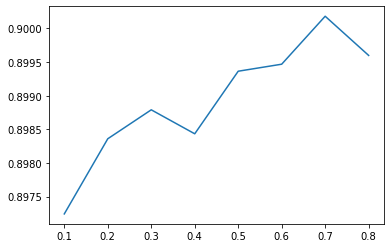

In [13]:
# Here are some percentages to get you started. Feel free to try more!
training_percentages = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80]
accuracies = []

for training_percentage in training_percentages:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=training_percentage)

    # This will create an empty logistic regression
    #logistic = LogisticRegression()
    tree = DecisionTreeClassifier(criterion="entropy")

    
    # This will fit/train your logistic regression
    #logistic.fit(X_train, Y_train)
    tree.fit(X_train, Y_train)

    
    # This will get predictions
    #Y_test_predicted = logistic.predict(X_test)
    Y_test_predicted = tree.predict(X_test)

    
    # With these predictions we can get an accuracy. Where should we store this accuracy?
    acc = accuracy_score(Y_test_predicted, Y_test)
    accuracies.append(acc)

# We want to plot our results. What list should we use for the x-axis? What about the y-axis?
plt.plot(training_percentages, accuracies)
plt.show()

# 5. Creating a simple fitting curve


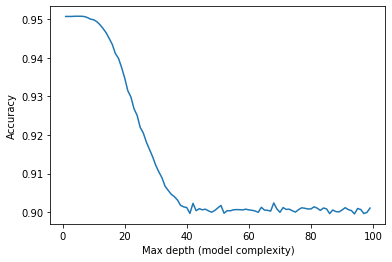

In [14]:
# Let's fit our training data size to 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80)

# Let's try different max depths for a decision tree
max_depths = range(1, 100)
accuracies = []

for max_depth in max_depths:
    # This will create an empty decision tree at a specified max depth
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    
    # This will fit/train your tree
    tree.fit(X_train, Y_train)
    
    # This will get accuracy and keep track of it
    Y_test_predicted = tree.predict(X_test)
    accuracies.append(accuracy_score(Y_test_predicted, Y_test))

# We want to plot our results
plt.plot(max_depths, accuracies)
plt.ylabel("Accuracy")
plt.xlabel("Max depth (model complexity)")
plt.show()

In [15]:
# Let's fit our training data size to 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80)

# Let's try different max depths for a decision tree
max_depths = range(1, 100)
accuracies = []

for max_depth in max_depths:
    # This will create an empty decision tree at a specified max depth
    tree = DecisionTreeClassifier(criterion="entropy", max_leaf_depth=max_depth)
    
    # This will fit/train your tree
    tree.fit(X_train, Y_train)
    
    # This will get accuracy and keep track of it
    Y_test_predicted = tree.predict(X_test)
    accuracies.append(accuracy_score(Y_test_predicted, Y_test))

# We want to plot our results
plt.plot(max_depths, accuracies)
plt.ylabel("Accuracy")
plt.xlabel("Max depth (model complexity)")
plt.show()

TypeError: __init__() got an unexpected keyword argument 'max_leaf_depth'